Linear Regression
1. Preprocess Test data and get predictions
2. Compute Mean Abolute Error, Mean Square error for test data
3. Implement Ridge and Lasso Regression and then compute the following metrics on test data

Trees
Compute errors on test sets
Play with different parameter of decision trees and random forests and see the impact on train and test error
[OPTIONAL] implement cross validation and get best hyperparameters

In [84]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
data.shape

(4277, 13)

In [5]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [6]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [7]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [8]:
#Handling null values in categorical columns
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


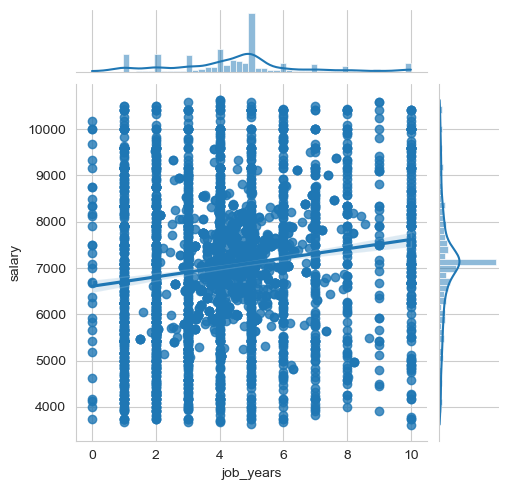

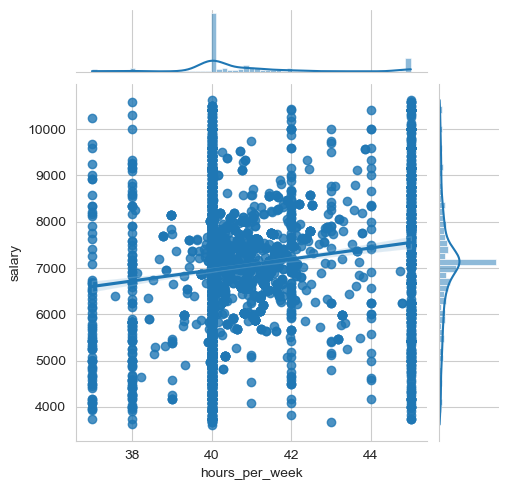

In [10]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

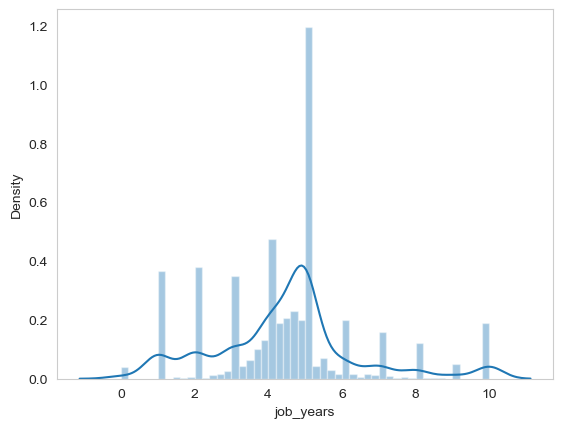

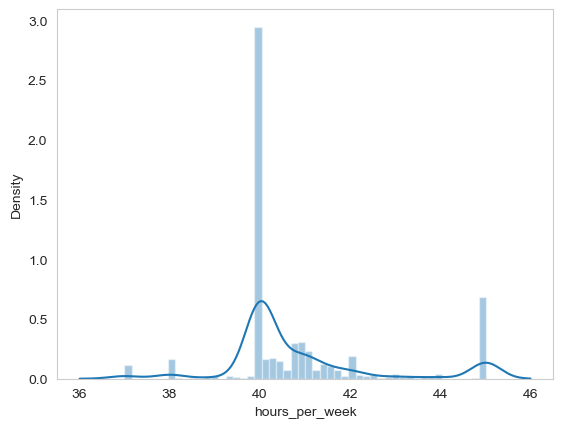

In [11]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

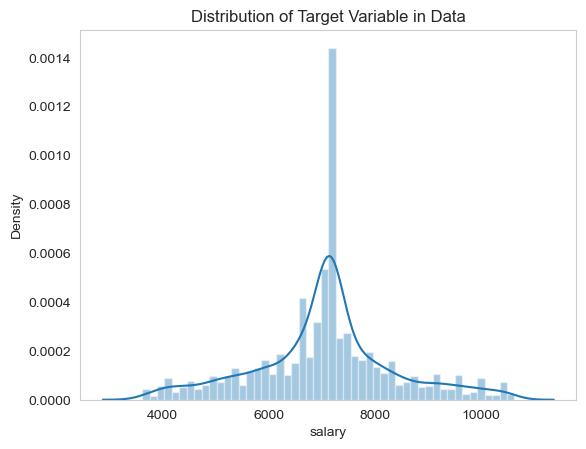

max: 10625.0
min: 3622.0


In [53]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

In [54]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [55]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [56]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [57]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [58]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [59]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


In [60]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [61]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [62]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
1885,-0.176559,0,-0.029305,-0.620481,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2017,2.265823,0,-0.494483,2.413749,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1923,-0.732639,0,-0.494483,-0.620481,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0.266849,1,-0.494483,-0.620481,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
241,-0.232895,0,2.379618,-0.620481,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,0.158869,1,-0.141310,-0.620481,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
311,0.266849,0,2.379618,-0.620481,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
506,-0.732639,1,-0.494483,-0.620481,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1315,0.737287,0,-0.475706,-0.013635,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [63]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [64]:
reg.coef_

array([ 1.94847861e+02,  7.81595127e+01,  1.78896328e+02,  2.33146222e+02,
        5.54974155e+01, -8.72751149e+01,  1.57363051e+02, -2.27195266e+03,
        1.00337603e+03,  7.53083429e+02,  7.47195556e+02,  4.48717844e+02,
        8.53303707e+02,  6.81433628e+02, -1.60572529e+02,  8.59790204e+02,
        4.54747351e-13,  3.46446409e+03,  3.63199887e+02, -1.01035175e+02,
        1.85331952e+02,  1.10243929e+02, -2.51552331e+02, -1.74776679e+02])

In [65]:
reg.intercept_

6243.418258737049

In [66]:
mean_absolute_error(y_train,reg.predict(X_train))

872.5652633259359

In [67]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1234.1137860905983

In [68]:
#Q1 and Q2
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

833.557241771558 1170.782132308084


In [69]:
X_test.describe()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.000000,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,0.023198,0.241595,-0.007256,0.021476,0.503518,0.038311,0.004691,0.0,0.079750,0.512119,0.003127,0.224394,0.048475,0.066458,0.015637,0.0,0.000782,0.0,0.550430,0.005473,0.168882,0.143081,0.143862,0.577795
std,0.983754,0.428217,1.027434,1.003648,0.500183,0.192022,0.068358,0.0,0.271011,0.500049,0.055858,0.417346,0.214853,0.249179,0.124116,0.0,0.027962,0.0,0.497645,0.073806,0.374794,0.350292,0.351087,0.494104
min,-2.231869,0.000000,-2.218944,-0.620481,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.492131,0.000000,-0.494483,-0.620481,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.117592,0.000000,-0.494483,-0.620481,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.266849,0.000000,0.145946,-0.013635,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.765566,1.000000,2.379618,2.413749,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


833.8376666732578 1171.285869967173


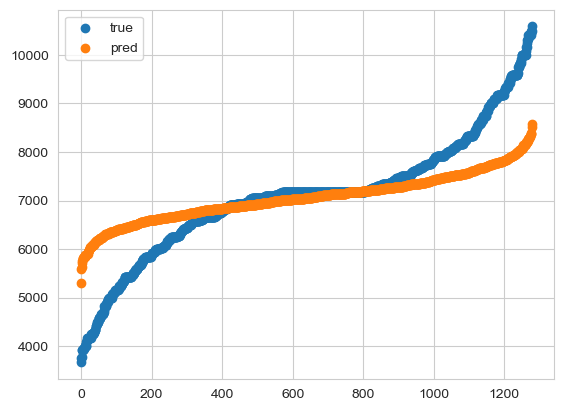

In [70]:
#Q3
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [71]:
ridge.coef_

array([  194.24198029,    80.02272489,   177.49131322,   233.58943101,
          59.33237044,   -85.95363169,   141.69915016, -1151.00144195,
         963.83953623,   717.61947919,   668.30742579,   413.86357464,
         811.53324192,   641.41483121,  -191.22601201,   411.32144355,
           0.        ,  1712.96759366,   362.78378638,   -91.69105738,
         184.01737141,   106.56896849,  -247.8246821 ,  -173.29954539])

834.3990536423435 1172.6343974024921


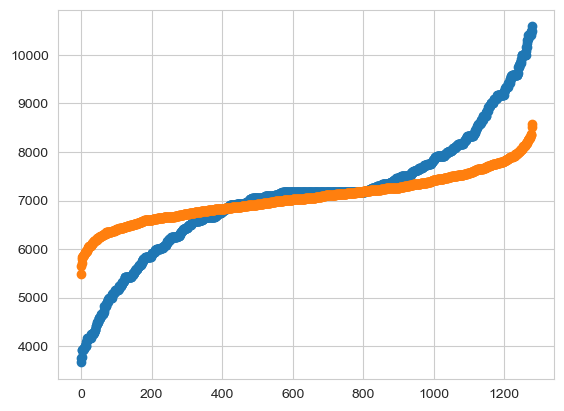

In [72]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [73]:
lasso.coef_

array([ 193.44767823,   80.20870598,  175.2930136 ,  233.08619594,
         61.02033349,  -57.32045911,    0.        ,   -0.        ,
        872.47747063,  635.25372519,  427.30129062,  331.03217709,
        713.32752248,  550.52807141, -214.75131902,    0.        ,
          0.        ,  372.19468373,  346.37737935,   -0.        ,
        164.41444066,   56.23094469, -204.40173396, -161.20920829])

In [74]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

#evaluating train error
mean_absolute_error(y_train,decisiontree.predict(X_train))

652.7281853581142

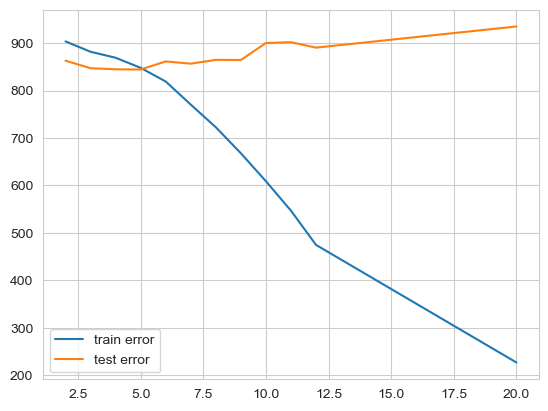

In [75]:
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

In [76]:
# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

408.06226467072577

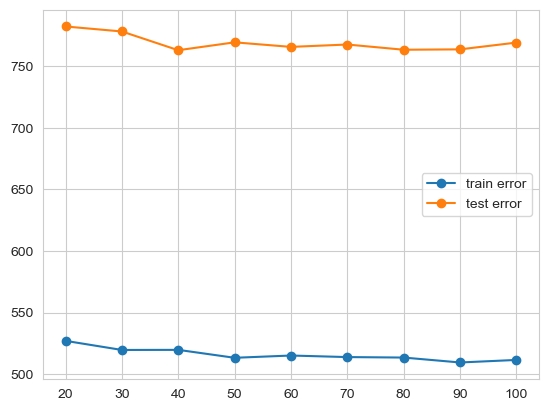

In [77]:
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()

In [78]:
pd.DataFrame({'feature':X_train.columns, "importance":randomf.feature_importances_*100}).sort_values(by='importance', ascending=False)

,feature,importance
0,job_years,25.732404
2,hours_per_week,16.170353
3,telecommute_days_per_week,8.810221
4,certifications,6.888956
23,is_education_computer_related_Yes,6.233858
1,is_manager,5.141104
9,job_title_DBA,4.677116
18,education_Bachelors (4 years),4.653393
11,job_title_Developer,3.785852
20,education_Masters,3.491209


In [79]:
# Task 1: Compute errors on test sets
decision_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=5)
decision_tree.fit(X_train, y_train)
y_pred_test = decision_tree.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

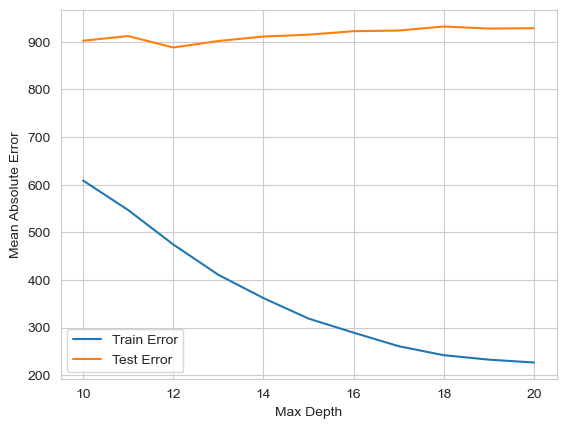

In [80]:
# Task 2: Play with different parameters
max_depth_list = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
train_error = []
test_error = []

for max_depth in max_depth_list:
    decision_tree = DecisionTreeRegressor(max_depth=max_depth)
    decision_tree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train, decision_tree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test, decision_tree.predict(X_test)))

# Plotting the errors
import matplotlib.pyplot as plt
plt.plot(max_depth_list, train_error, label='Train Error')
plt.plot(max_depth_list, test_error, label='Test Error')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [85]:
# Task 3: Optional - Implement cross-validation and get best hyperparameters
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_